In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

# PyCon PH Stats

In [104]:
def get_attendees(year):
    df = pd.read_csv('{}/attendees.csv'.format(year))
    df = df.where(df['Checkin Status'] == 'Checked In')
    df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
    return df
csv_2015 = get_attendees(2015)
csv_2016 = get_attendees(2016)
pie_kwargs = dict(kind='pie', autopct='%.2f%%')

## Gender ratio

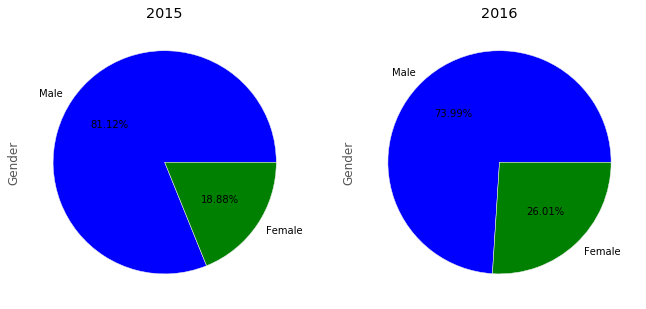

In [105]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 5))
csv_2015['Gender'].value_counts().plot(ax=ax1, title='2015', **pie_kwargs)
csv_2016['Gender'].value_counts().plot(ax=ax2, title='2016', **pie_kwargs)
fig.show()

## Level of experience with Python

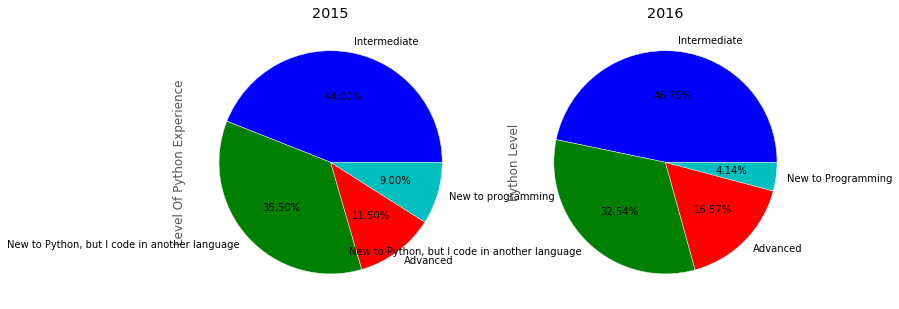

In [106]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 5))
csv_2015['Level Of Python Experience'].value_counts().plot(ax=ax1, title='2015', **pie_kwargs)
csv_2016['Python Level'].value_counts().plot(ax=ax2, title='2016', **pie_kwargs)
fig.show()

It's quite interesting to see a similar ratio for the previous year and this year. We can use this information in selecting talk topics that will make it to our program.

## Age

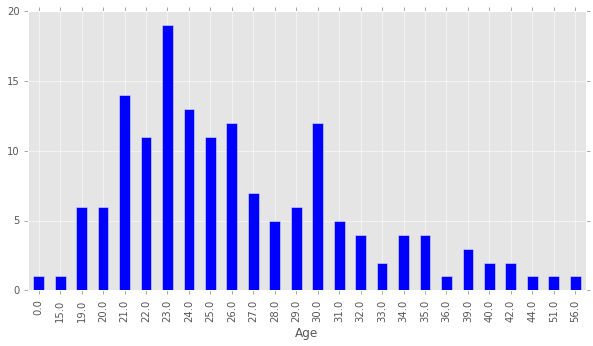

In [107]:
csv_2016.groupby('Age')['Ticket ID'].count().plot(kind='bar', figsize=(10, 5))

## Location

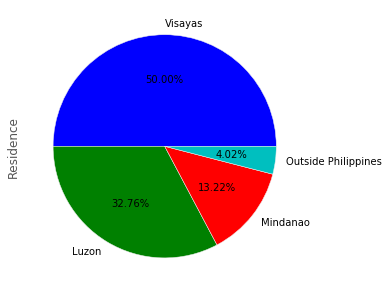

In [108]:
csv_2016['Residence'].value_counts().plot(figsize=(5, 5), **pie_kwargs)

Most of our attendees this year came from Visayas! No surprise there. But I wonder about last year.

## Sales

### Ticket types

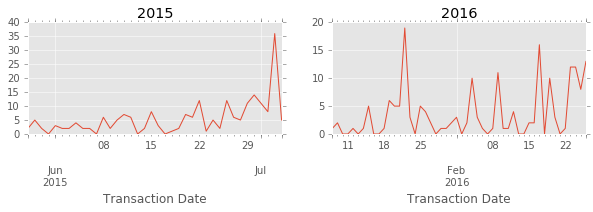

In [109]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 2))
csv_2015.set_index(csv_2015['Transaction Date']).groupby(pd.TimeGrouper('D'))['Ticket ID'].count() \
    .plot(ax=ax1, title='2015')
csv_2016.set_index(csv_2016['Transaction Date']).groupby(pd.TimeGrouper('D'))['Ticket ID'].count() \
    .plot(ax=ax2, title='2016')
fig.show()

Last year's marketing efforts were concentrated near the event. We were advertising this year's event more consistently since the start of February. That led to a more uniform graph than last year's.

### Ticket orders

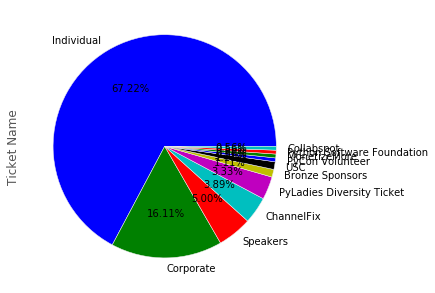

In [110]:
csv_2016['Ticket Name'].value_counts().plot(figsize=(5, 5), **pie_kwargs)